### Question 10 in chatper 9 of Hands-On Machine Learning by Aurélien Géron (2nd Edition)

In [7]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
olivetti_faces = fetch_olivetti_faces(download_if_missing=True)

In [3]:
olivetti_faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [4]:
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti_faces.data, olivetti_faces.target))

X_train_valid = olivetti_faces.data[train_valid_idx]
y_train_valid = olivetti_faces.target[train_valid_idx]

X_test = olivetti_faces.data[test_idx]
y_test = olivetti_faces.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))

X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]

X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

c:\Users\fpaul\anaconda3\envs\ml_ibm_cert\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\fpaul\anaconda3\envs\ml_ibm_cert\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\fpaul\anaconda3\envs\ml_ibm_cert\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\fpaul\anaconda3\envs\ml_ibm_cert\lib\site-packages\sklearn\cluster\_kmeans.p

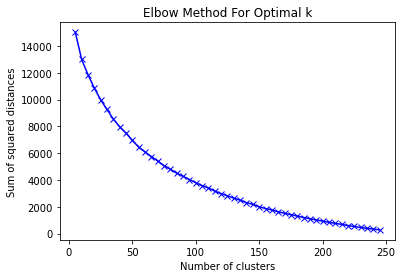

In [15]:

sum_squared_distances = []
kmeans_per_k = []
kmeans_clusters_range = range(5, 250, 5)
for k in kmeans_clusters_range:
    kmeans = KMeans(n_clusters = k).fit(X_train)
    sum_squared_distances.append(kmeans.inertia_)
    kmeans_per_k.append(kmeans)


plt.plot(kmeans_clusters_range, sum_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Without reducing the dataset, things take too long and not producing great results, so lets reduce the dataset

In [16]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

c:\Users\fpaul\anaconda3\envs\ml_ibm_cert\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\fpaul\anaconda3\envs\ml_ibm_cert\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\fpaul\anaconda3\envs\ml_ibm_cert\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\fpaul\anaconda3\envs\ml_ibm_cert\lib\site-packages\sklearn\cluster\_kmeans.p

Text(0.5, 1.0, 'Elbow Method For Optimal k')

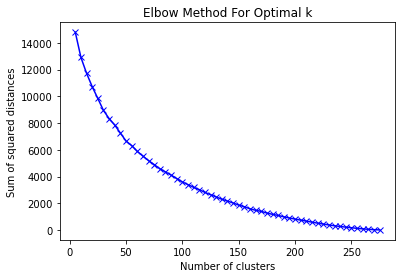

In [36]:
sum_squared_distances = []
kmeans_per_k = []
kmeans_clusters_range = range(5, 280, 5)
for k in kmeans_clusters_range:
    kmeans = KMeans(n_clusters = k).fit(X_train_pca)
    sum_squared_distances.append(kmeans.inertia_)
    kmeans_per_k.append(kmeans)

plt.plot(kmeans_clusters_range, sum_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')

<AxesSubplot:>

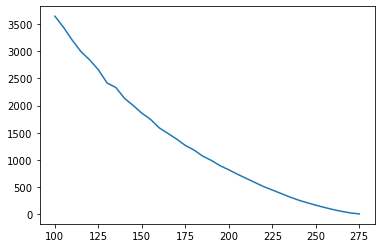

In [35]:
import seaborn as sns
sns.lineplot(x = kmeans_clusters_range[kmeans_clusters_range.index(100):], y = sum_squared_distances[kmeans_clusters_range.index(100):])

Not quite clear what the optimal k is for this dataset. Let's try the silhousette method

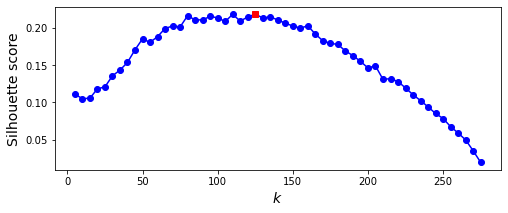

In [38]:
from sklearn.metrics import silhouette_score
import numpy as np

silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]

best_inertia_index = np.argmax(silhouette_scores)
best_k = kmeans_clusters_range[best_inertia_index]
best_score = silhouette_scores[best_inertia_index]

plt.figure(figsize=(8, 3))
plt.plot(kmeans_clusters_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [40]:
best_k

125

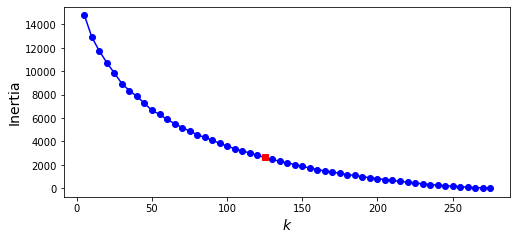

In [39]:
best_inertia = sum_squared_distances[best_inertia_index]

plt.figure(figsize=(8, 3.5))
plt.plot(kmeans_clusters_range, sum_squared_distances, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

Cluster 0


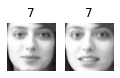

Cluster 1


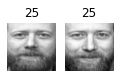

Cluster 2


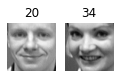

Cluster 3


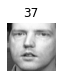

Cluster 4


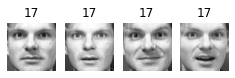

Cluster 5


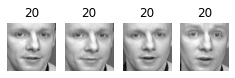

Cluster 6


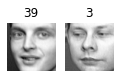

Cluster 7


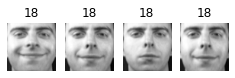

Cluster 8


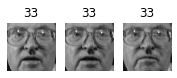

Cluster 9


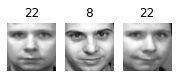

Cluster 10


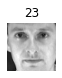

Cluster 11


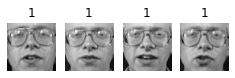

Cluster 12


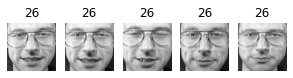

Cluster 13


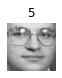

Cluster 14


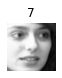

Cluster 15


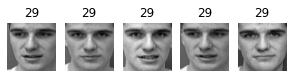

Cluster 16


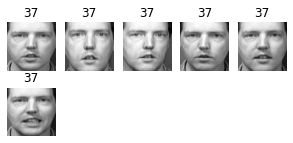

Cluster 17


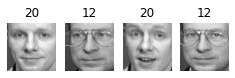

Cluster 18


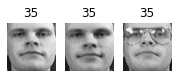

Cluster 19


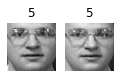

Cluster 20


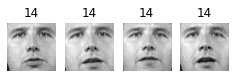

Cluster 21


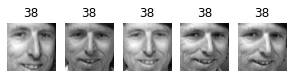

Cluster 22


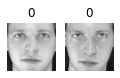

Cluster 23


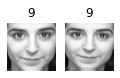

Cluster 24


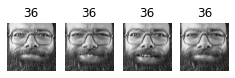

Cluster 25


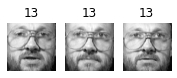

Cluster 26


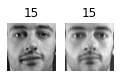

Cluster 27


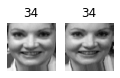

Cluster 28


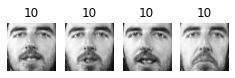

Cluster 29


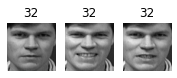

Cluster 30


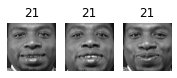

Cluster 31


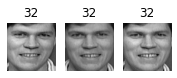

Cluster 32


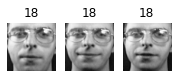

Cluster 33


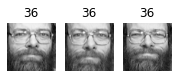

Cluster 34


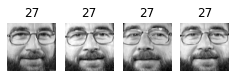

Cluster 35


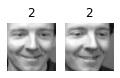

Cluster 36


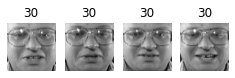

Cluster 37


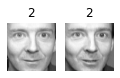

Cluster 38


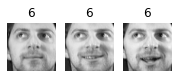

Cluster 39


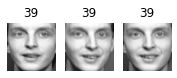

Cluster 40


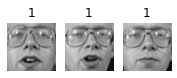

Cluster 41


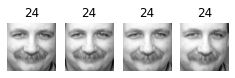

Cluster 42


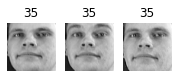

Cluster 43


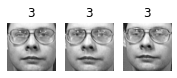

Cluster 44


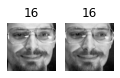

Cluster 45


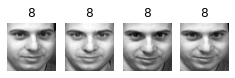

Cluster 46


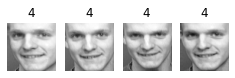

Cluster 47


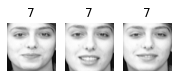

Cluster 48


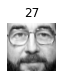

Cluster 49


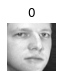

Cluster 50


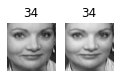

Cluster 51


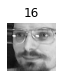

Cluster 52


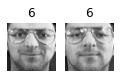

Cluster 53


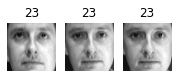

Cluster 54


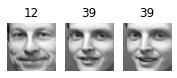

Cluster 55


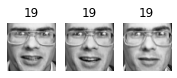

Cluster 56


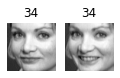

Cluster 57


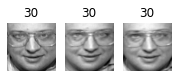

Cluster 58


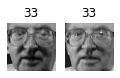

Cluster 59


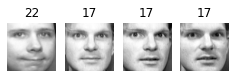

Cluster 60


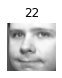

Cluster 61


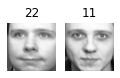

Cluster 62


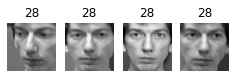

Cluster 63


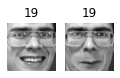

Cluster 64


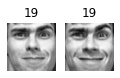

Cluster 65


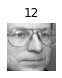

Cluster 66


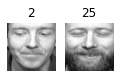

Cluster 67


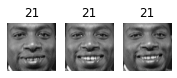

Cluster 68


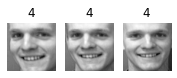

Cluster 69


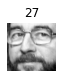

Cluster 70


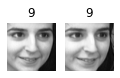

Cluster 71


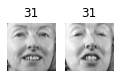

Cluster 72


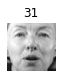

Cluster 73


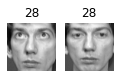

Cluster 74


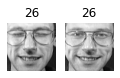

Cluster 75


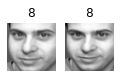

Cluster 76


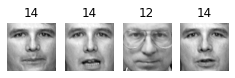

Cluster 77


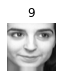

Cluster 78


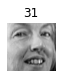

Cluster 79


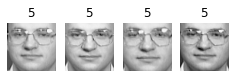

Cluster 80


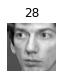

Cluster 81


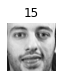

Cluster 82


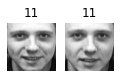

Cluster 83


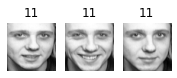

Cluster 84


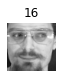

Cluster 85


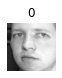

Cluster 86


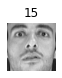

Cluster 87


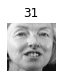

Cluster 88


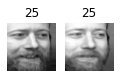

Cluster 89


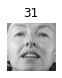

Cluster 90


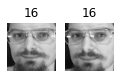

Cluster 91


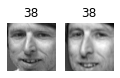

Cluster 92


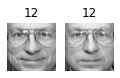

Cluster 93


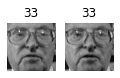

Cluster 94


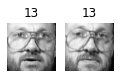

Cluster 95


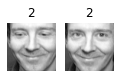

Cluster 96


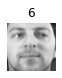

Cluster 97


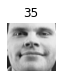

Cluster 98


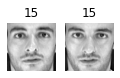

Cluster 99


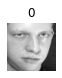

Cluster 100


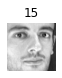

Cluster 101


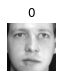

Cluster 102


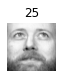

Cluster 103


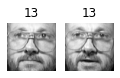

Cluster 104


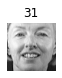

Cluster 105


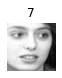

Cluster 106


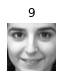

Cluster 107


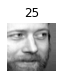

Cluster 108


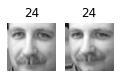

Cluster 109


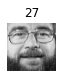

Cluster 110


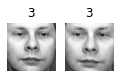

Cluster 111


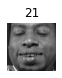

Cluster 112


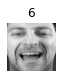

Cluster 113


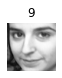

Cluster 114


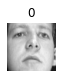

Cluster 115


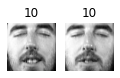

Cluster 116


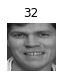

Cluster 117


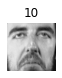

Cluster 118


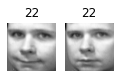

Cluster 119


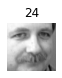

Cluster 120


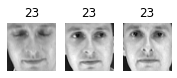

Cluster 121


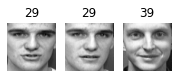

Cluster 122


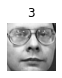

Cluster 123


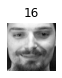

Cluster 124


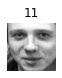

In [41]:
best_model = kmeans_per_k[best_inertia_index]

def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

clusters = best_model.labels_
for cluster_id in np.unique(clusters):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_ == cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)


### Question 11 in chatper 9 of Hands-On Machine Learning by Aurélien Géron (2nd Edition)

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)
clf.score(X_valid_pca, y_valid)

0.9